# Customer Segmentation with k-Prototypes Clustering

We will use a clustering based approach to group customers into segments.

This is a form of unsupervised learning. 

The purpose of customer segmentation is to understand our customer base better, and can be used as an exploratory starting point before further analysis.

# k-Prototypes Clustering

k-prototypes is a more general version of the popular k-means clustering.

k-means clustering aims to cluster data points such that we minimize the sum of squared distances between each data point and its cluster's centroid. It only applies to continuous variables.

k-modes clustering aims to cluster **categorical** data points such that we minimize the number of mismatches between each data point and its cluster's centroid. 

In k-prototypes clustering, we use k-means clustering for the continuous variables, but we use k-modes clustering for categorical variables. Therefore, we use a combined dissimilarity metric (sum of squared distance for continuous variables, and the mismatch count for the categorical variable to assign each data point to a cluster)

In [1]:
import importlib
import pandas as pd
import utils

#include k-means explanation above

In [2]:
importlib.reload(utils)

<module 'utils' from '/Users/nicolearitranair/ml-basics/notebook/utils.py'>

In [3]:
import numpy as np

df = utils.get_customer_segmentation_data()
df

,Customer_ID,Age,Gender,CreditScore,Tenure,Balance,NumOfProducts,Education,HasTravelCard,HasCashBackCard,HasPointsCard,HasRewardsCard,HasSecuredCard,Transaction_Count,Avg_Transaction_Value,EstimatedSalary
2,3,61,M,783,9,199491.201077,5,6,1,1,1,1,1,4,455.478013,140573.061204
544,545,69,M,817,9,195704.837129,5,6,1,0,1,1,0,4,443.214399,140236.940131
2,3,49,M,829,5,105183.060875,1,5,0,1,1,1,0,4,230.940238,118841.812127
414,415,43,F,803,5,121600.921141,1,4,0,0,1,0,1,4,211.260303,135930.303547
188,189,66,M,845,9,194538.137261,5,6,1,1,1,1,1,4,406.011393,140411.416538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,818,23,F,368,1,3061.056910,1,2,0,1,1,1,1,1,35.270083,25079.284818
546,547,60,M,805,9,197233.837333,5,6,1,0,1,1,0,4,427.673953,140972.873909
382,383,64,M,785,9,194796.772163,5,6,1,0,1,1,0,4,498.225903,140411.281648
177,178,21,F,342,1,3381.526349,1,1,0,1,1,0,1,1,28.744508,34576.013767


In [4]:
df.to_csv("output_data/customer-segmentation-data.csv", index=False)

In [5]:
df

,Customer_ID,Age,Gender,CreditScore,Tenure,Balance,NumOfProducts,Education,HasTravelCard,HasCashBackCard,HasPointsCard,HasRewardsCard,HasSecuredCard,Transaction_Count,Avg_Transaction_Value,EstimatedSalary
2,3,61,M,783,9,199491.201077,5,6,1,1,1,1,1,4,455.478013,140573.061204
544,545,69,M,817,9,195704.837129,5,6,1,0,1,1,0,4,443.214399,140236.940131
2,3,49,M,829,5,105183.060875,1,5,0,1,1,1,0,4,230.940238,118841.812127
414,415,43,F,803,5,121600.921141,1,4,0,0,1,0,1,4,211.260303,135930.303547
188,189,66,M,845,9,194538.137261,5,6,1,1,1,1,1,4,406.011393,140411.416538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,818,23,F,368,1,3061.056910,1,2,0,1,1,1,1,1,35.270083,25079.284818
546,547,60,M,805,9,197233.837333,5,6,1,0,1,1,0,4,427.673953,140972.873909
382,383,64,M,785,9,194796.772163,5,6,1,0,1,1,0,4,498.225903,140411.281648
177,178,21,F,342,1,3381.526349,1,1,0,1,1,0,1,1,28.744508,34576.013767


# Normalizing the input data

We use min-max normalization on all the continuous features in the input data. 

The purpose of min-max normalization is to ensure that features with "larger" ranges do not dominate the clustering process compared to features with "smaller" ranges.

For example, "Balance" might have a much larger range than "Age" so we want to control for this.

In [6]:
df_to_cluster_normalize  = df.iloc[:,1:].copy()

continuous_columns = ["Age", "CreditScore", "Tenure", "Balance", "NumOfProducts", "Transaction_Count", "Avg_Transaction_Value", "EstimatedSalary"]
mins_dict = {}
maxes_dict = {}

for col in continuous_columns:
    print(col)
    #rescale the continuous data
    mins_dict[col] = df_to_cluster_normalize[col].min()
    maxes_dict[col] = df_to_cluster_normalize[col].max()
    df_to_cluster_normalize[col] = (df_to_cluster_normalize[col]-df_to_cluster_normalize[col].min())/(df_to_cluster_normalize[col].max()-df_to_cluster_normalize[col].min())

Age
CreditScore
Tenure
Balance
NumOfProducts
Transaction_Count
Avg_Transaction_Value
EstimatedSalary


# Determine an appropriate number of clusters

Since we are not sure of how the customers should be segmented, we can first use the Elbow Method to determine an appropriate number of clusters.

In the Elbow Method, we will calculate
- within-cluster sum of squares (compared to centroid) for continuous variables
- total number of category mismatches with centroid for the categorical variables

Logically, we will always observe a decrease in the cost, and we want to find the "elbow" point in cost reduction that tells us to stop increasing clusters.

In the plot below, we can see that it clearly occurs at 3 clusters.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 5619.872351092366
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 5619.872351092366
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 5619.872351092366
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 5619.872351092366
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 5619.872351092366
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 505, ncost: 3337.035277537354
Run: 1, iteration: 2/100, moves: 680, ncost: 2580.1524408303303
Run: 1, iteration: 3/100, moves: 124, ncost: 2520.4304413737837
Ru

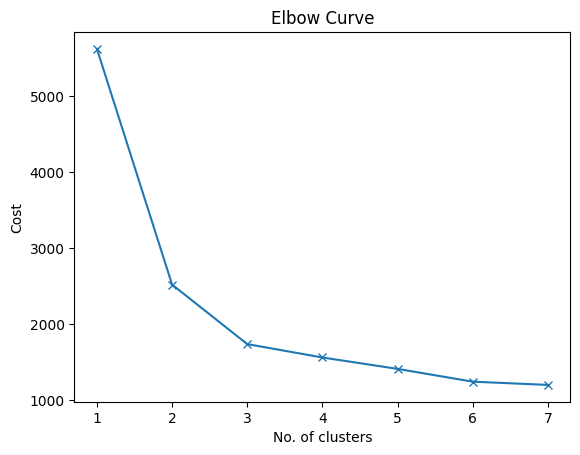

In [7]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
# Elbow curve to find optimal K 

cost = [] 
kmode_models = []
K = [1, 2, 3, 4, 5, 6, 7]
for k in list(K): 
    kmode = KPrototypes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(df_to_cluster_normalize, categorical=[1, 6, 7, 8, 9, 10, 11]) 
    cost.append(kmode.cost_)
    kmode_models.append(kmode)
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [8]:
from kmodes.kprototypes import KPrototypes

kmode = KPrototypes(n_clusters=3, init = "random", n_init = 5, verbose=1, random_state=12345) 
kmode.fit_predict(df_to_cluster_normalize, categorical=[1, 6, 7, 8, 9, 10, 11]) 

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2069, ncost: 2187.8632520579185
Run: 1, iteration: 2/100, moves: 837, ncost: 1762.3740512843974
Run: 1, iteration: 3/100, moves: 66, ncost: 1738.4116201480015
Run: 1, iteration: 4/100, moves: 1, ncost: 1738.4103573774685
Run: 1, iteration: 5/100, moves: 0, ncost: 1738.4103573774685
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 895, ncost: 1854.8303144820838
Run: 2, iteration: 2/100, moves: 381, ncost: 1738.4335133833326
Run: 2, iteration: 3/100, moves: 4, ncost: 1738.4103573774694
Run: 2, iteration: 4/100, moves: 0, ncost: 1738.4103573774694
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 886, ncost: 1738.4133864530318
Run: 3, iteration: 2/100, moves: 1, ncost: 1738.4103573774685
Run: 3, i

array([1, 1, 0, ..., 1, 2, 1], dtype=uint16)

In [9]:
df_to_cluster_normalize["Label"] = kmode.labels_
df["Label"] = kmode.labels_

In [10]:
kmode.cluster_centroids_

array([['0.5692156862745097', '0.9562003642987256', '0.6097777777777725',
        '0.6248075691706404', '4.887201754399939e-16', '1.0',
        '0.3740838943655432', '0.8068091780329983', 'M', '4', '0', '1',
        '0', '1', '1'],
       ['0.910803921568629', '0.90779781420765', '0.9999999999999214',
        '0.974956980294533', '0.9003999999999928', '1.0',
        '0.8961839442668815', '0.9605673349588465', 'M', '6', '1', '1',
        '1', '0', '0'],
       ['0.05705882352941228', '0.09005282331511828',
        '0.056111111111111694', '0.02608703129819711', '0.0', '0.0',
        '0.031488212150133844', '0.11712648111739073', 'M', '1', '0',
        '1', '1', '0', '1']], dtype='<U32')

# Analyzing the customer segments

First, let's look at the categorical variables.

We can see that cluster 0 is made of a femal majority, with a medium level of education and who tend to not have credit cards. 

Cluster 1 is made up of a male majority, with a low level of education and who tend to not have credit cards.

Cluster 2 is made up of a highly educated male majority who tend to have credit cards.

In [12]:
df_to_cluster_normalize.columns

Index(['Age', 'Gender', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts',
       'Education', 'HasTravelCard', 'HasCashBackCard', 'HasPointsCard',
       'HasRewardsCard', 'HasSecuredCard', 'Transaction_Count',
       'Avg_Transaction_Value', 'EstimatedSalary', 'Label'],
      dtype='object')

# Cluster Profile

Let's look in more detail at the profiles of each of the 3 clusters

In [13]:
def visualize_cluster(cluster_idx):
    gender_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==cluster_idx]["Gender"].value_counts()
    education_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==cluster_idx]["Education"].value_counts()
    has_tc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==cluster_idx]["HasTravelCard"].value_counts()
    has_cc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==cluster_idx]["HasCashBackCard"].value_counts()
    has_pc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==cluster_idx]["HasPointsCard"].value_counts()
    has_rc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==cluster_idx]["HasRewardsCard"].value_counts()
    has_sc_vc = df_to_cluster_normalize[df_to_cluster_normalize["Label"]==cluster_idx]["HasSecuredCard"].value_counts()    

    plt.figure(figsize=(20, 20))

    plt.subplot(4, 4, 1)
    plt.bar(gender_vc.index, gender_vc)
    plt.title("Gender")


    plt.subplot(4, 4, 2)
    plt.bar(education_vc.index, education_vc)
    plt.title("Education")


    plt.subplot(4, 4, 3)
    plt.bar(has_tc_vc.index, has_tc_vc)
    plt.title("Has Travel Card")


    plt.subplot(4, 4, 4)
    plt.bar(has_cc_vc.index, has_cc_vc)
    plt.title("Has Cashback Card")


    plt.subplot(4, 4, 5)
    plt.bar(has_pc_vc.index, has_pc_vc)
    plt.title("Has Points Card")


    plt.subplot(4, 4, 6)
    plt.bar(has_rc_vc.index, has_rc_vc)
    plt.title("Has Rewards Card")


    plt.subplot(4, 4, 7)
    plt.bar(has_sc_vc.index, has_sc_vc)
    plt.title("Has Secured Card")

    c = 8
    for x in continuous_columns:
        plt.subplot(4, 4, c)
        plt.hist(df[df["Label"]==cluster_idx][x])
        plt.title(x)
        c+=1

    plt.show()

# Cluster 0: Middle aged people with medium to high incomes who prefer rewards cards

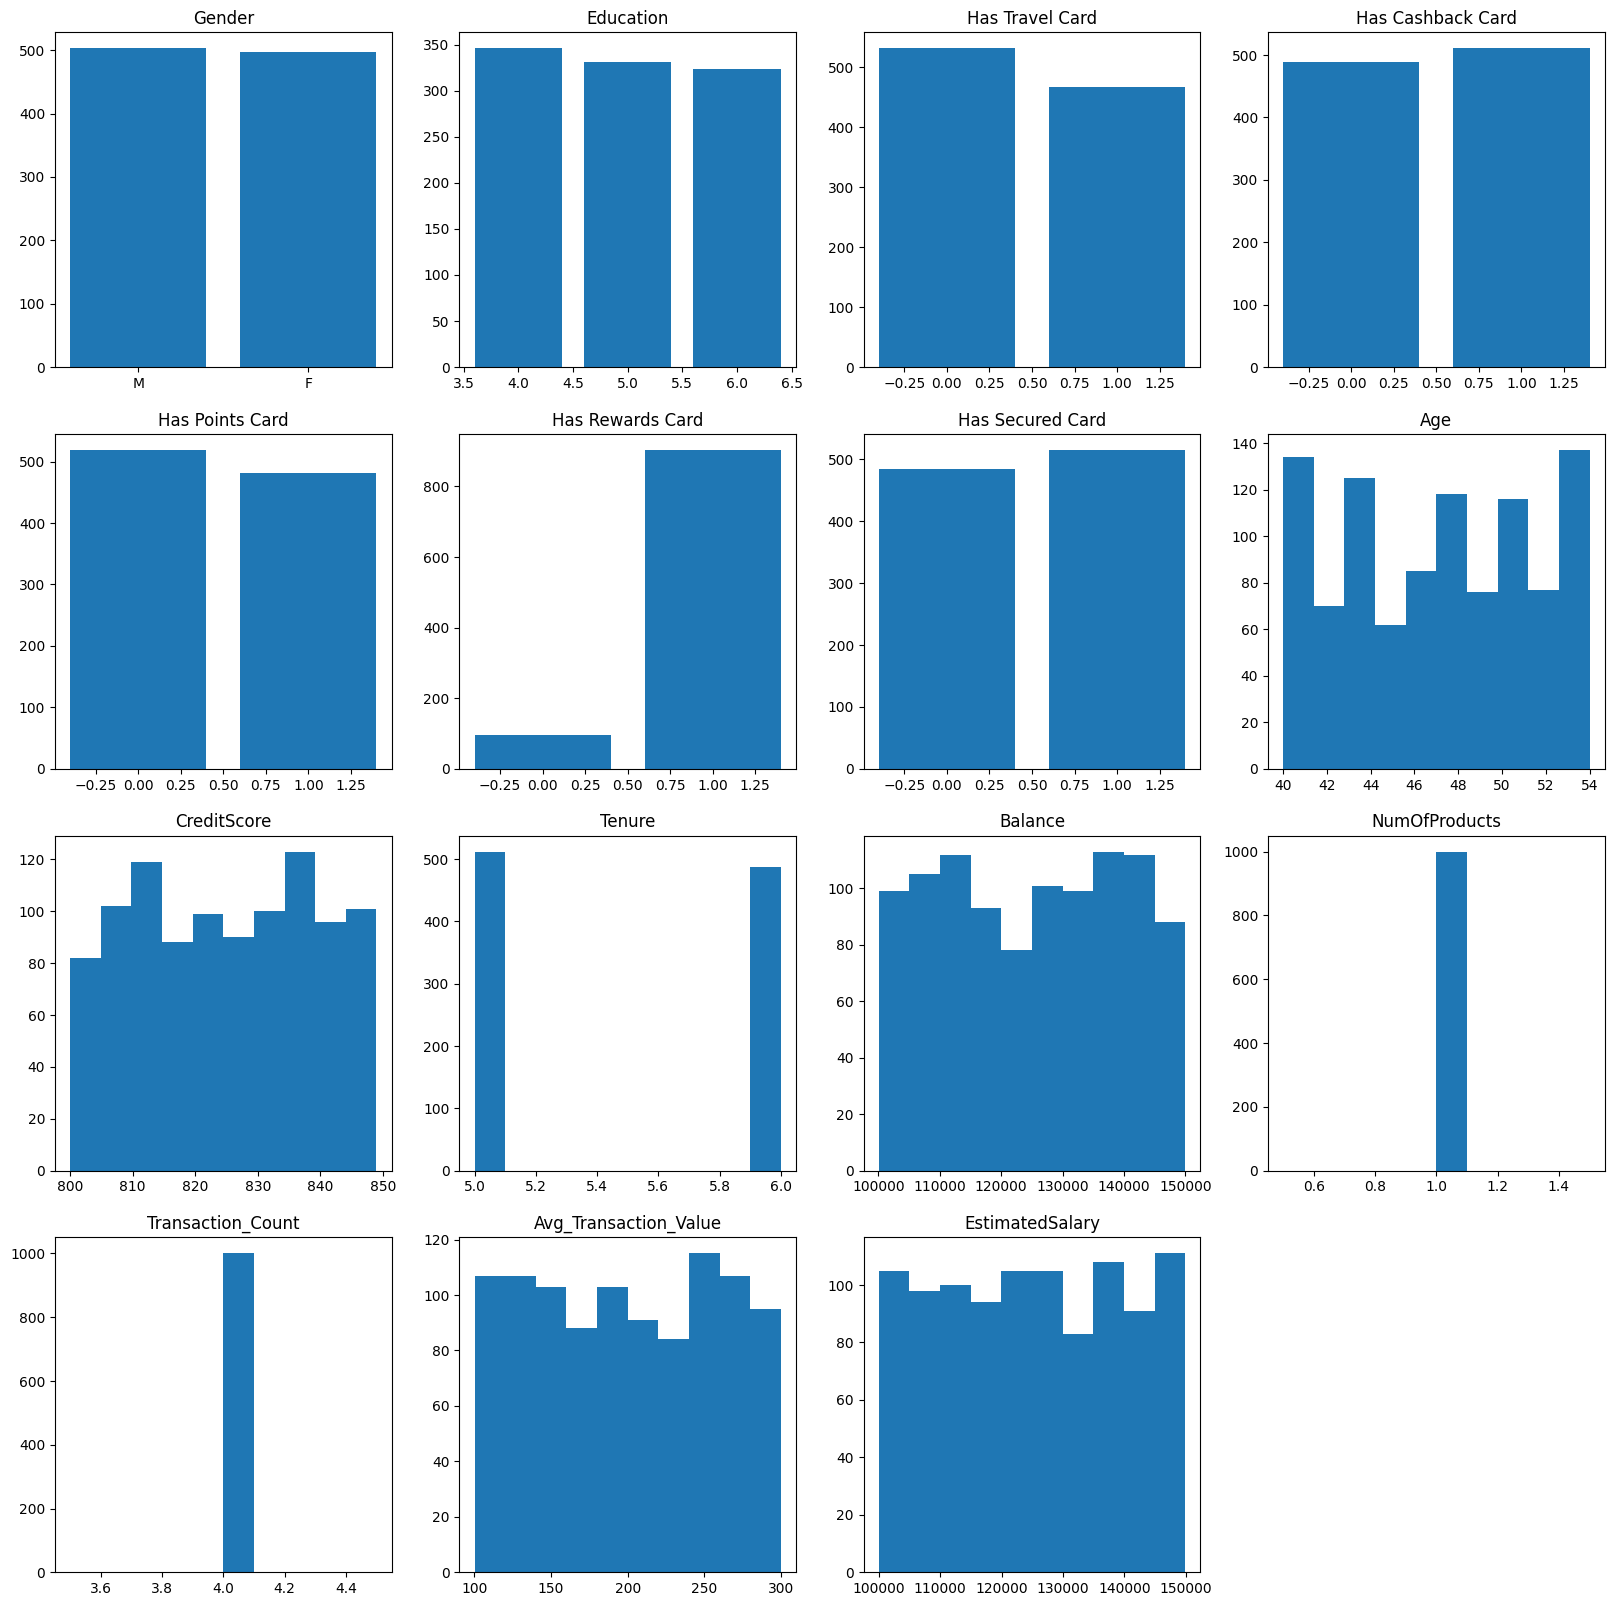

In [14]:
visualize_cluster(0)

# Cluster 1: Older people with higher incomes and who prefer travel cards and points cards

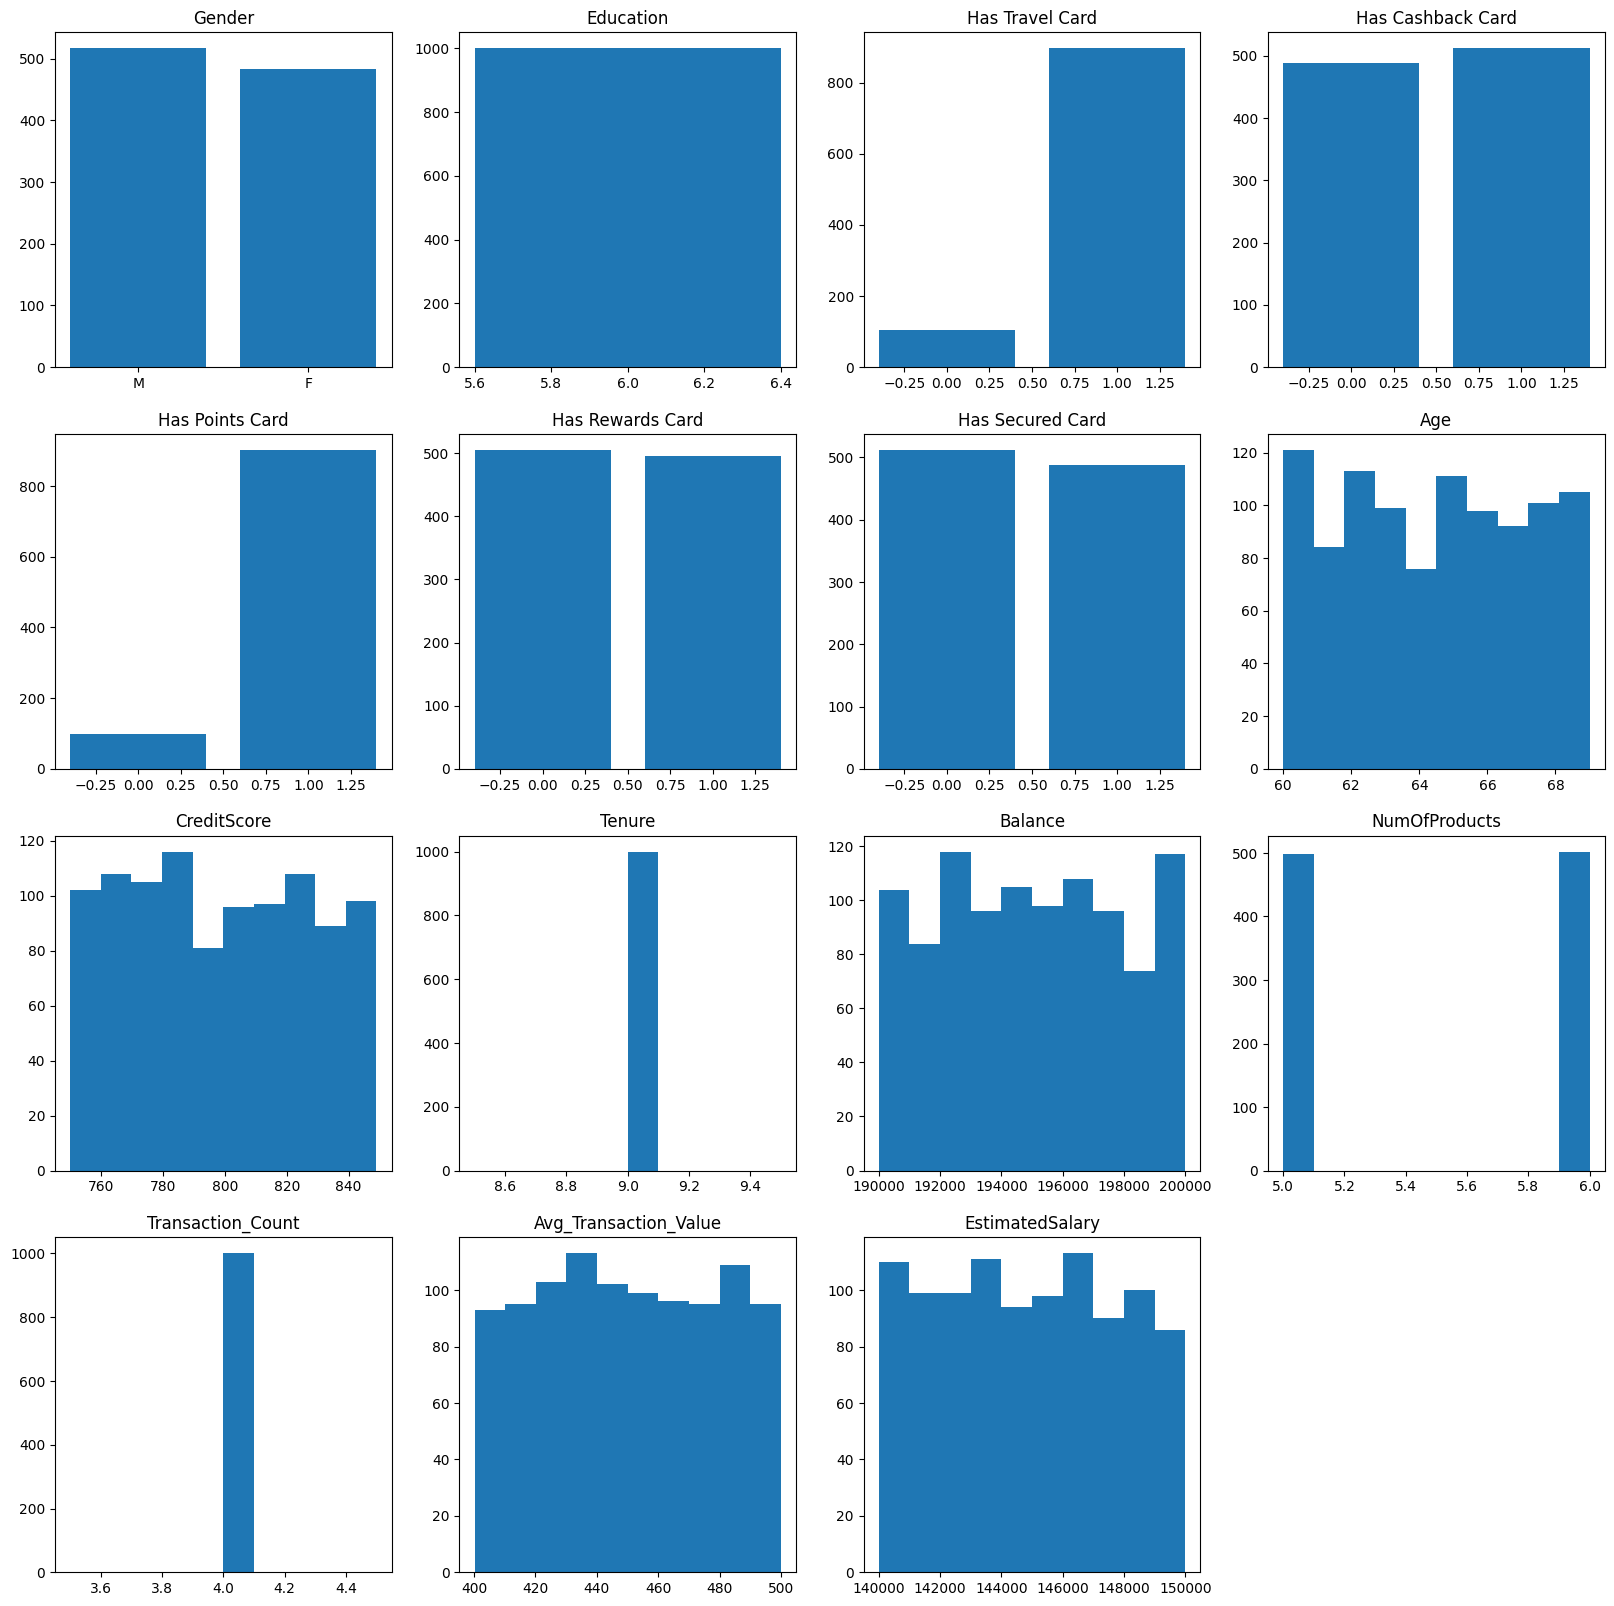

In [15]:
visualize_cluster(1)

# Cluster 2: Young people with lower incomes and prefer cashback card

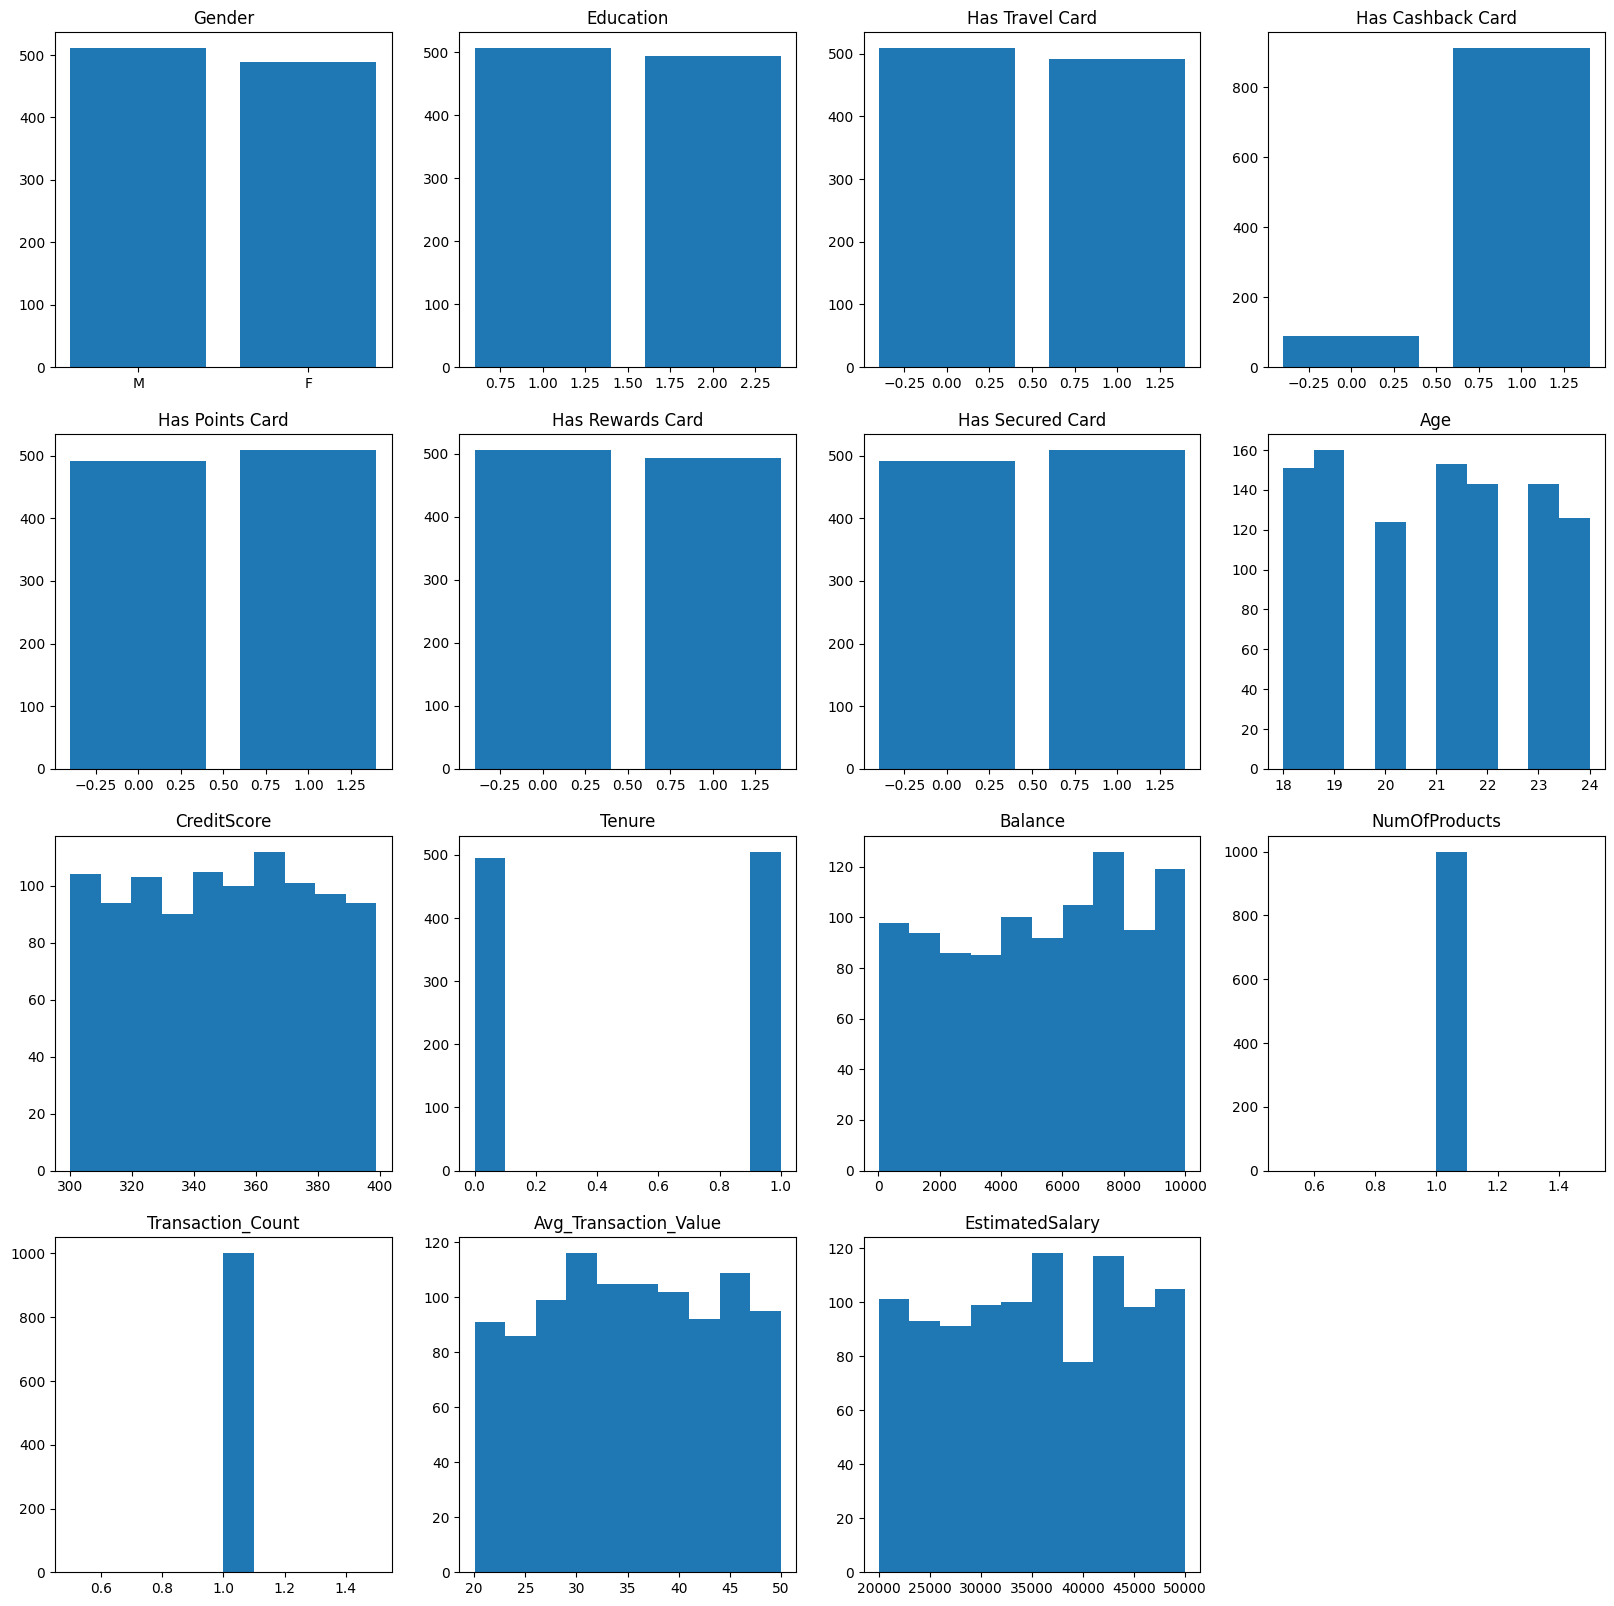

In [16]:
visualize_cluster(2)

# Assigning a cluster to a new user

Finally, if we have a new bank user, we might want to classify them into a cluster. 

For example, perhaps we want to see which product to recommend to them.

In this case, we might want to exclude the product columns and just compute similarity based on the other columns (in some cases, we might include all columns)

In [25]:
new = np.array(
    [[(45-mins_dict["Age"])/(maxes_dict["Age"]-mins_dict["Age"]), 
      (800-mins_dict["CreditScore"])/(maxes_dict["CreditScore"]-mins_dict["CreditScore"]),  
      (8-mins_dict["Tenure"])/(maxes_dict["Tenure"]-mins_dict["Tenure"]),  
      (70000-mins_dict["Balance"])/(maxes_dict["Balance"]-mins_dict["Balance"]),  
      (1-mins_dict["NumOfProducts"])/(maxes_dict["NumOfProducts"]-mins_dict["NumOfProducts"]),  
      (1-mins_dict["Transaction_Count"])/(maxes_dict["Transaction_Count"]-mins_dict["Transaction_Count"]),
      (200-mins_dict["Avg_Transaction_Value"])/(maxes_dict["Avg_Transaction_Value"]-mins_dict["Avg_Transaction_Value"]),
      (100000-mins_dict["EstimatedSalary"])/(maxes_dict["EstimatedSalary"]-mins_dict["EstimatedSalary"]),
      0, 
      4, 
      0,
      0, 
      0,
      0,
      0]])
kmode.predict(new, categorical=[8, 9, 10, 11, 12, 13, 14])


array([0], dtype=uint16)

Here the user has been assigned to cluster 0. This makes sense as she is a middle income, middle-aged person.

It might be a good idea to recommend rewards cards to her, as people in her demographic seem to prefer it.